#ワクチン接種歴がある患者がインフルエンザにかかっている確率(適合率)がどのように変化するかプログラムすることにより数値を導出し、考察

In [14]:
import numpy as np
# 検査陽性の適合率PC(T)
def PCT(p, rc, sp):
  fp=1-sp
  return rc * p / ( rc * p + fp * (1. - p))

# 検査陰性の適合率PC(F)
def PCF(p, rc, sp):
  fn=1-rc
  return sp * (1. - p) / ( fn * p + sp * (1. - p))

# 正解率AC
def AC(p, rc, sp):
  return rc*p + sp*(1. - p)

In [22]:
# 感度RCは2-12程度と言われているので間をとって7
rc=0.07

# 特異度SPは82-83程度と言われているので82
sp=0.82

In [16]:
# 罹患率P(罹患=T)を0から1に0.01ずつ作る
p = np.arange(0, 1, 1/100)

In [17]:
# 検査陽性の適合率PC(T)、検査陰性の適合率PC(F)、正解率(AC)を各罹患率P(罹患=T)で求める
pct = PCT(p, rc, sp)
pcf = PCF(p, rc, sp)
ac = AC(p, rc, sp)

In [18]:
!pip install japanize-matplotlib

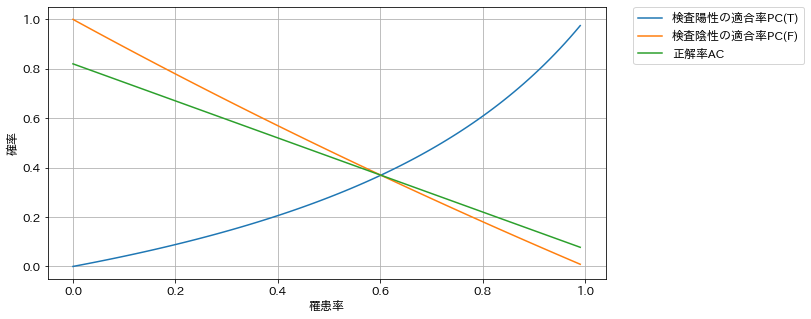

In [19]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.rcParams["font.size"] = 12
plt.subplots(figsize=(10,5))
plt.plot(p, pct, label='検査陽性の適合率PC(T)')
plt.plot(p, pcf, label='検査陰性の適合率PC(F)')
plt.plot(p, ac, label='正解率AC')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.grid(which='both')
plt.xlabel('罹患率')
plt.ylabel('確率')
plt.show()

In [20]:
# 検査陽性でも罹患していない確率
ffp=1-pct
# 検査陰性でも罹患している確率
ffn=1-pcf

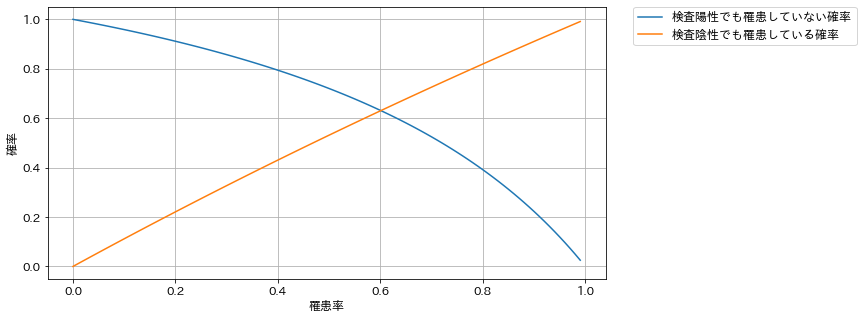

In [21]:
plt.rcParams["font.size"] = 12
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(p, ffp, label='検査陽性でも罹患していない確率')
ax.plot(p, ffn, label='検査陰性でも罹患している確率')
ax.grid(which='both')
plt.xlabel('罹患率')
plt.ylabel('確率')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

- 考察
  - ワクチン接種歴がある患者の適合率PC(T)は、事前確率P(罹患=T)が低いと悪化し、P(罹患=T)=0.1のとき、ワクチン接種歴がある患者がインフルエンザにかかっている確率(適合率)は10%になる。